### Time Slice Photography

### Alex Isbill

Import the things we'll need:

In [4]:
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt

### Part 1.1: Slicing Directly Across Time

The following CSV file contains an index of the `plaza` image set. These are just the frames of a video broken out into individual images to make them easier to work with. The index has columns for just the Filename and the full URL where the image lives.

In [13]:
plaza_index = pd.read_csv("https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_21f/data/plaza.csv")
plaza_index

,Filename,URL
0,plaza0001.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
1,plaza0002.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
2,plaza0003.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
3,plaza0004.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
4,plaza0005.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
...,...,...
445,plaza0446.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
446,plaza0447.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
447,plaza0448.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
448,plaza0449.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...


You can use `imageio.imread` to load an image directly from a URL into an array:

In [3]:
image0 = imageio.imread(plaza_index["URL"][0])

You can look at an image with `plt.imshow`:

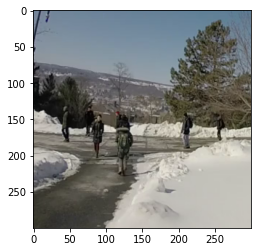

In [4]:
plt.imshow(image0)

**Creating Image Stack**
* In order to get a slice of the image across time, we need to get a 4d array with dimensions corresponding to frames, rows, columns, and color channels. 
* To do this, we loop from through the dataframe and append each image array to a list. 
* Then, use the np.stack() function to combine all frames into one 4-dimensional array.

In [5]:
images = []
for i in range(450):
    images.append(imageio.imread(plaza_index["URL"][i]))
cube = np.stack(images)
cube.shape

(450, 300, 300, 3)

**Creating a Direct Slice**
* From the frame above, we can look at which columns might be interesting to keep fixed in our slice.
* Slicing with the 200th column fixed will give us a look at the people that move through a small path of sidewalk over time.
* This is accomplished by slicing into our space time cube taking all frames, rows, and color channels while keeping the column fixed at the 200 position.
* The direct cut is then rotated until it is in the position that displays people in the the correct orientation. This gives us a look at this portion of the image from the 0th to 450th frame moving along the x-axis.

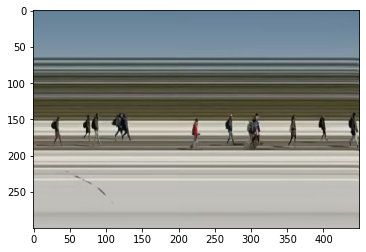

In [6]:
direct = cube[:,:,200,:]
rotated = np.rot90(direct,3)
plt.imshow(rotated)

### Part 1.2: Slicing Diagonally Across Time and Space

Here's a similar index file to the NYC skyline image set that I used in the example in the lab handout:

In [7]:
ny_index = pd.read_csv("https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_21f/data/ny.csv")
ny_index

,Filename,URL
0,ny0001.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
1,ny0002.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
2,ny0003.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
3,ny0004.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
4,ny0005.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
...,...,...
833,ny0834.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
834,ny0835.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
835,ny0836.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
836,ny0837.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...


In [9]:
ny =[]
for i in range(838):
    ny.append(imageio.imread(ny_index["URL"][i]))
nyStack = np.stack(ny)

In [10]:
nyStack.shape

(838, 480, 854, 3)

**Creating Diagonal Slice**
* As in part 1.1, a 4d array of all frames is created by using the .stack() function.
* For a diagonal slice, we need to move across space and time.
    * This is achieved by taking the 1st column of the 1st frame, the 2nd column of the 2nd frame, and so one.
    * We can iterate over all frames and append the ith column of the ith frame to a list.
    * Using stack with axis 1 will create a 3d array where the slices are combined along the column axis, forming the final image.

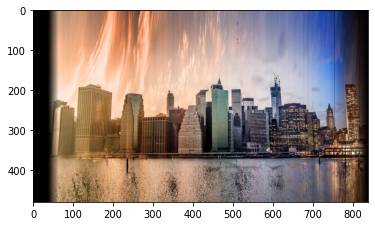

In [11]:
cols = []
for i in range(838):
    cols.append(nyStack[i,:,i,:])

final = np.stack(cols,axis =1)
plt.imshow(final)